<a href="https://colab.research.google.com/github/HadrienBd/Natural_Language_Processing/blob/main/nlp_project_bernard_hadrien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment analysis**

## Sommaire

- [Data preparation](#1)
    - [Importing librairies](#2)
    - [Importing data](#3)
    - [Cleaning data](#4)
    - [Displaying vocabulary](#5)
- [Training our model](#6)
    - [2.0 Initialisation du modèle](#2)
        - [Exercise 01](#ex-01)

<a name='1'></a>
##Data prepatation

<a name='2'></a>
###First step : Importing librairies

In [144]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a name='3'></a>
###Importing data

In [113]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [139]:
df = pd.read_csv('gdrive/MyDrive/NLP_DATA/training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1")
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'original_tweet']

In [140]:
df.head()

,sentiment,id,date,query,user_id,original_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [141]:
#Remove everything execpt tweet content
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [142]:
#We change label in sentiment : 0 -> Negative 4 -> Positive
label_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return label_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,original_tweet
0,Negative,is upset that he can't update his Facebook by ...
1,Negative,@Kenichan I dived many times for the ball. Man...
2,Negative,my whole body feels itchy and like its on fire
3,Negative,"@nationwideclass no, it's not behaving at all...."
4,Negative,@Kwesidei not the whole crew


Dzisplay data distribution

Text(0.5, 1.0, 'Sentiment Data Distribution')

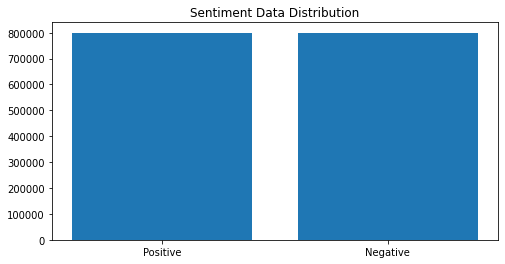

In [143]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

Shuffle dataset

In [119]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
1201732,Positive,@evanhindra waaeehhh.. weleh... u keep them fo...
1147025,Positive,@ashhattack yes mam! I think they should play ...
1598334,Positive,"@phaoloo : I've been sick, but now I'm getting..."
665935,Negative,I do so much deleting of un-wanted followers t...
50907,Negative,is annoyed x
904357,Positive,@meriel I know it's not meeeee. Im surprised e...
465836,Negative,hates the fact that i have summer school almos...
404489,Negative,Suppose i should go to bed! I need to revise f...
1565486,Positive,GR8 job 2! @realandrews In case yall didn't kn...
1157119,Positive,Going home tomorrow


<a name='4'></a>
###Cleaning data

In [145]:
stop_words = stopwords.words('english')

stemmer = EnglishStemmer()

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [150]:
def clean_data(text, stem=False, stop=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if stop:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
    else: 
      if token not in stop_words:
        if stem:
          tokens.append(stemmer.stem(token))
        else:
          tokens.append(token)       
  return " ".join(tokens)

In [147]:
df['text'] = df.original_tweet.apply(lambda x: clean_data(x))

In [148]:
df['text_stem'] = df.original_tweet.apply(lambda x: clean_data(x, True))

In [151]:
df['text_stem_stop'] = df.original_tweet.apply(lambda x: clean_data(x, True, True))

In [152]:
df.head()

,sentiment,original_tweet,text,text_stem,text_stem_stop
0,Negative,is upset that he can't update his Facebook by ...,is upset that he can t updat his facebook by t...,is upset that he can t updat his facebook by t...,is upset that he can t updat his facebook by t...
1,Negative,@Kenichan I dived many times for the ball. Man...,i dive mani time for the ball manag to save 50...,i dive mani time for the ball manag to save 50...,i dive mani time for the ball manag to save 50...
2,Negative,my whole body feels itchy and like its on fire,my whole bodi feel itchi and like it on fire,my whole bodi feel itchi and like it on fire,my whole bodi feel itchi and like it on fire
3,Negative,"@nationwideclass no, it's not behaving at all....",no it s not behav at all i m mad whi am i here...,no it s not behav at all i m mad whi am i here...,no it s not behav at all i m mad whi am i here...
4,Negative,@Kwesidei not the whole crew,not the whole crew,not the whole crew,not the whole crew


<a name='5'></a>
###Displaying vocabulary

In [85]:
positive_words = []
for tweet in df[df.sentiment == 'Positive'].text :
  for word in tweet.split():
    positive_words.append(word)

positive_words_freq = dict()
for w in positive_words:
    if w not in positive_words_freq.keys():
      positive_words_freq[w] = 1
    else:
      positive_words_freq[w] += 1

positive_words_freq = dict(reversed(sorted(positive_words_freq.items(), key=lambda item: item[1])))
print({k: positive_words_freq[k] for k in list(positive_words_freq)[:10]})

{'i': 382903, 'the': 266084, 'to': 252546, 'a': 199680, 'you': 198328, 'and': 149638, 'it': 147800, 'my': 125975, 'for': 117369, 'is': 108935}


In [86]:
negative_words = []
for tweet in df[df.sentiment == 'Negative'].text :
  for word in tweet.split():
    negative_words.append(word)

negative_words_freq = dict()
for w in negative_words:
    if w not in negative_words_freq.keys():
      negative_words_freq[w] = 1
    else:
      negative_words_freq[w] += 1

negative_words_freq = dict(reversed(sorted(negative_words_freq.items(), key=lambda item: item[1])))
print({k: negative_words_freq[k] for k in list(negative_words_freq)[:10]})

{'i': 575468, 'to': 313150, 'the': 257902, 'my': 190840, 'a': 183131, 'it': 157476, 'and': 153965, 'is': 128032, 't': 125430, 'in': 115442}


<a name='6'></a>
##Model preparation

<a name='7'></a>
###Spliting dataset

We split out dataset into train data (80%) and test data (20%)

In [87]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [88]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=7)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1279999
Test Data size 320000


In [89]:
train_data.head(10)

,sentiment,text
1176709,Positive,lol you will get what s coming to you in a goo...
641121,Negative,i would miss dreaming if i didn t anymore
1132400,Positive,poletii check that out i m following that woma...
130866,Negative,im sick the only thing that would make me feel...
1235875,Positive,sounds like my cup of tea where do we sign up
1568154,Positive,i think i m going to take a hot bath amp liste...
758235,Negative,i feel tired today i m not going to gym
1446219,Positive,weekend resting in peace finally
763239,Negative,i am sooo jealous i hope one day i can make it...
584093,Negative,don t say that i ll cry hahah


<a name='8'></a>
###Tokenize

In [90]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290811


In [91]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text), maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text), maxlen = MAX_SEQUENCE_LENGTH)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

Training X Shape: (1279999, 30)
Testing X Shape: (320000, 30)


In [92]:
labels = train_data.sentiment.unique().tolist()

In [93]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1279999, 1)
y_test shape: (320000, 1)


<a name='9'></a>
###Word embedding
We will use GloVe to build our embedding *layer*

In [109]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [95]:
#GLOVE_EMB = '/kaggle/working/glove.6B.300d.txt'
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [96]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [97]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [98]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [99]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

<a name='10'></a>
##Model training

<a name='10'></a>
###Long Short-Term Memory

In [100]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [101]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

<a name='11'></a>
###Training

In [102]:
print("Training on GPU...") if tf.config.list_physical_devices('GPU') else print("Training on CPU...")

Training on GPU...


In [103]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 267s 211ms/step - loss: 0.5169 - accuracy: 0.7386 - val_loss: 0.4321 - val_accuracy: 0.7986
Epoch 2/10
1250/1250 [==============================] - 264s 211ms/step - loss: 0.4413 - accuracy: 0.7936 - val_loss: 0.4157 - val_accuracy: 0.8087
Epoch 3/10
1250/1250 [==============================] - 263s 210ms/step - loss: 0.4242 - accuracy: 0.8034 - val_loss: 0.4086 - val_accuracy: 0.8125
Epoch 4/10
1250/1250 [==============================] - 262s 210ms/step - loss: 0.4158 - accuracy: 0.8086 - val_loss: 0.4076 - val_accuracy: 0.8128
Epoch 5/10
1250/1250 [==============================] - 261s 209ms/step - loss: 0.4110 - accuracy: 0.8109 - val_loss: 0.4028 - val_accuracy: 0.8158
Epoch 6/10
1250/1250 [==============================] - 261s 209ms/step - loss: 0.4051 - accuracy: 0.8146 - val_loss: 0.4008 - val_accuracy: 0.8175
Epoch 7/10
1250/1250 [==============================] - 259s 207ms/step - loss: 0.4018 - accuracy: 0.8165 - val_

<a name='12'></a>
##Model evaluation

<a name='12'></a>
###Learning Curve of loss and accuracy

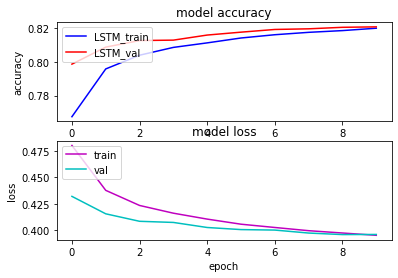

In [104]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [105]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 5s 144ms/step


<a name='12'></a>
###Confusion matrix

In [106]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

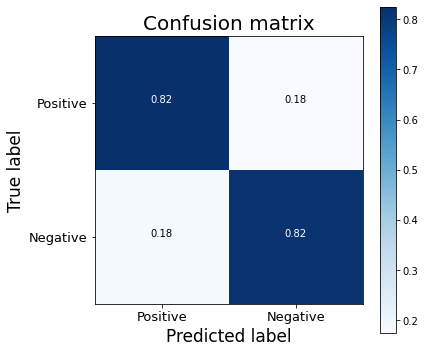

In [107]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

<a name='14'></a>
###Classification scores

In [108]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.82      0.82      0.82    160336
    Positive       0.82      0.82      0.82    159664

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000

